In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
sns.set_context("paper")

In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.

In [2]:
df = pd.read_pickle("box.pkl")
df.describe()

,length,width,height,diag,invarea,invvol
count,111357.000000,111357.000000,111357.000000,111357.000000,111357.000000,111357.000000
mean,10.108340,13.170936,132.419908,133.630276,0.000175,0.000075
std,3.110916,4.864470,30.116953,29.899911,0.000059,0.000044
min,4.000196,6.000059,88.019998,88.486407,0.000040,0.000007
25%,8.058930,10.086372,108.779999,110.010617,0.000132,0.000046
50%,9.809747,12.098702,126.500000,127.799263,0.000167,0.000066
75%,11.798224,14.746299,151.000000,151.877052,0.000210,0.000092
max,20.999931,36.997408,219.979998,222.689189,0.000519,0.000437


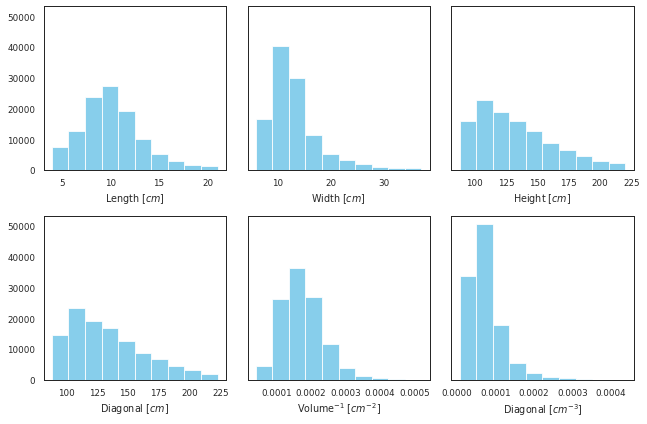

In [3]:
# general

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(9, 6), sharey=True)
axs = axes.ravel()

names = ["Length", "Width", "Height", "Diagonal", "Volume$^{-1}$", "Diagonal"]
units = ["$cm$", "$cm$", "$cm$", "$cm$", "$cm^{-2}$", "$cm^{-3}$"]

for ax, col, name, unit in zip(axs, df.columns, names, units):
    ax.hist(df[col], facecolor="skyblue")
    ax.set_xlabel(f"{name} [{unit}]")
    
fig.tight_layout()
fig.savefig("./59_hist1D_general.png")

In [4]:
class Feature:
    def __init__(self, name=None, data=None, unit=None):
        self.name = name  # str
        self.data = data  # numpy.array
        self.unit = unit  # str
    
    def set_name(self, name):
        self.name = name
    
    def set_data(self, data):
        self.data = data
        
    def set_unit(self, data):
        self.unit = unit

In [5]:
X0 = Feature("Length", unit="$cm$")
X1 = Feature("Width", unit="$cm$")
X2 = Feature("Height", unit="$cm$")
X3 = Feature("Diagonal", unit="$cm$")
X4 = Feature("Surf.Area$^{-1}$", unit="$cm^{-2}$")
X5 = Feature("Volume$^{-1}$", unit="$cm^{-3}$")

Xs = [X0, X1, X2, X3, X4, X5] 

In [6]:
for X, col in zip(Xs, df.columns):
    X.set_data(df[col].values)

In [7]:
# X4
print(f"X4.name= {X4.name}")
print(f"X4.data= {X4.data}")
print(f"X4.unit= {X4.unit}")

X4.name= Surf.Area$^{-1}$
X4.data= [0.00026171 0.00018886 0.00017365 ... 0.0003015  0.00037055 0.00041062]
X4.unit= $cm^{-2}$


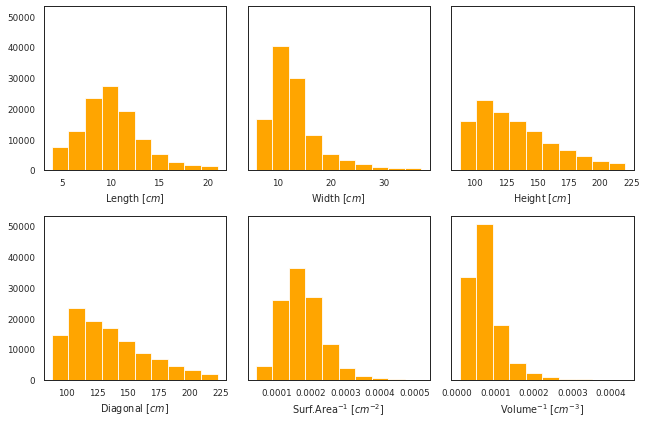

In [8]:
# class

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(9, 6), sharey=True)
axs = axes.ravel()

for ax, X in zip(axs, Xs):
    ax.hist(X.data, facecolor="orange")
    ax.set_xlabel(f"{X.name} [{X.unit}]")

fig.tight_layout()
fig.savefig("./59_hist1D.png")

**class with Function**

In [9]:
def get_stats(data):
    minval = data.min()
    maxval = data.max()
    rangeval = maxval - minval
    leftval = minval - 0.1*rangeval
    rightval = maxval + 0.1*rangeval
    
    return minval, maxval, rangeval, leftval, rightval
        
class Feature:
    def __init__(self, name=None, data=None, unit=None):
        self.name = name  # str
        self.data = data  # numpy.array
        self.unit = unit  # str
        # simple statistics
        if data:
            self.min, self.max, self.range, self.left, self.right = get_stats(self.data)
    
    def set_name(self, name):
        self.name = name
    
    def set_data(self, data):
        self.data = data
        self.min, self.max, self.range, self.left, self.right = get_stats(self.data)
        
    def set_unit(self, data):
        self.unit = unit

In [10]:
X0 = Feature("Length", unit="$cm$")
X1 = Feature("Width", unit="$cm$")
X2 = Feature("Height", unit="$cm$")
X3 = Feature("Diagonal", unit="$cm$")
X4 = Feature("Surf.Area$^{-1}$", unit="$cm^{-2}$")
X5 = Feature("Volume$^{-1}$", unit="$cm^{-3}$")

Xs = [X0, X1, X2, X3, X4, X5] 

In [11]:
for X, col in zip(Xs, df.columns):
    X.set_data(df[col].values)

In [12]:
#simple statistics
print(f"X2.min = {X2.min}")
print(f"X2.max = {X2.max}")
print(f"X2.range = {X2.range}")
print(f"X2.left = {X2.left}")
print(f"X2.right = {X2.right}")

X2.min = 88.0199983215
X2.max = 219.97999786399998
X2.range = 131.9599995425
X2.left = 74.82399836725
X2.right = 233.17599781824998


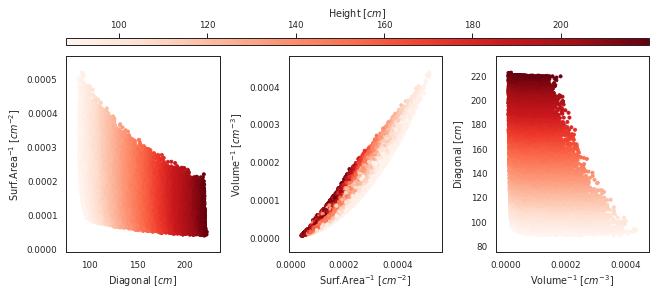

In [13]:
fig, axs = plt.subplots(ncols=3, figsize=(9, 4), constrained_layout=True) #, gridspec_kw={"width_ratios":[8,8,8,1]})

xs = [X3, X4, X5]
ys = [X4, X5, X3]
c = X2

for ax, x, y in zip(axs[:3], xs, ys):
    
    im = ax.scatter(x.data, y.data, c=c.data, cmap="Reds", s=10)
    ax.set_xlabel(f"{x.name} [{x.unit}]")
    ax.set_ylabel(f"{y.name} [{y.unit}]")
    ax.set_xlim(x.left, x.right)
    ax.set_ylim(y.left, y.right)

cbar = fig.colorbar(im, ax=axs, location="top", aspect=40, shrink=1)
cbar.set_label(f"{c.name} [{c.unit}]")
fig.savefig("./59_scatter.png")